In [107]:
# Laurent LEQUIEVRE
# Research Engineer, CNRS (France)
# Institut Pascal UMR6602
# laurent.lequievre@uca.fr

A REMINDER : CLASS torch.nn.Linear(in_features, out_features, bias=True)

Applies a linear transformation to the incoming data: y = x*W^T + b

Parameters:

in_features -> size of each input sample (i.e. size of x)

out_features -> size of each output sample (i.e. size of y)

bias -> If set to False, the layer will not learn an additive bias. Default: True
    
Note that the weights W have shape (out_features, in_features) and biases b have shape (out_features). 
They are initialized randomly and can be changed later 
(e.g. during the training of a Neural Network they are updated by some optimization algorithm).

In [108]:
import torch
import torch.nn as nn

In [109]:
# Concrete example of nn.Linear
# Create a tensor x of size 3 x 2
# Where x contains three inputs (i.e. the batch size is 3), x[0], x[1] and x[3], each of size 2
x = torch.tensor([[1.0, -1.0],
                  [0.0,  1.0],
                  [0.0,  0.0]])

in_features = x.shape[1]  # = 2
out_features = 5

m = nn.Linear(in_features, out_features)

y = m(x)

# create a fully connected linear layer, which takes input x of shape (batch_size, in_features), 
# where batch size is the number of inputs (each of size in_features) 
# which are passed to the network at once (as a single tensor), 
# and transforms it by the linear equation y = x*W^T + b into a tensor y of shape (batch_size, out_features).

# Internal parameters :
# -> Weights W have shape (out_features, in_features) -> W(5,2)
# -> Biases b have shape (out_features) -> b(5)

# Output :
# y is going to be of shape (batch size, out_features) -> y(3, 5).

# and (behind the scenes) it is computed as:
# y = x.matmul(m.weight.t()) + m.bias  # y = x*W^T + b
# ==> y(3,5) = x(3,2) * W^T(2,5) + b(5)

In [110]:
# m.weight and m.bias were initialized randomly.
print(m.weight.size())
print(m.weight)

torch.Size([5, 2])
Parameter containing:
tensor([[ 0.0180, -0.2841],
        [ 0.6567,  0.4979],
        [ 0.5744, -0.2351],
        [-0.5446,  0.5431],
        [ 0.3402,  0.1160]], requires_grad=True)


In [111]:
print(m.bias.size())
print(m.bias)

torch.Size([5])
Parameter containing:
tensor([ 0.3922,  0.4148,  0.1743, -0.4459,  0.1953], requires_grad=True)


In [112]:
# The output y is :
print(y.size())
print(y)

torch.Size([3, 5])
tensor([[ 0.6943,  0.5736,  0.9839, -1.5336,  0.4195],
        [ 0.1081,  0.9126, -0.0608,  0.0972,  0.3112],
        [ 0.3922,  0.4148,  0.1743, -0.4459,  0.1953]],
       grad_fn=<AddmmBackward>)


In [113]:
import torch
import torch.nn as nn  # define a shortcut 'nn' to avoid always use 'torch.nn'
import torch.nn.functional as F # define a shortcut 'F' to avoid always use 'torch.nn.functional' 

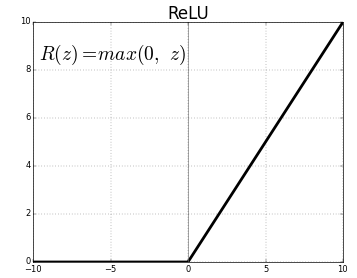

In [114]:
# Example 1 :
# =========
# A simple network : 2 Inputs, 3 outputs and 1 relu activation Function
# Defined step by step with a Linear Module

x = torch.tensor([1.0, -1.0]) # define a tensor torch.Size([2])

net = nn.Linear(2, 3) # define a Linear network with in_features=2, out_features=3, bias=True (by default)

print("input : {}".format(x))
print("--------------------------------")

print("Weight : {}".format(net.weight))
print("Bias : {}".format(net.bias))
print("--------------------------------")

output = net.forward(x) # forward tensor into the net and get the output
y = x.matmul(net.weight.t()) + net.bias # just to verify the equation : y = x*W^T + b

print("output : {}".format(output))
print("y : {}".format(y))
print("--------------------------------")

# ReLU: ReLU stands for Rectified Linear Unit. 
# It takes a real-valued input and thresholds it at zero (replaces negative values with zero)
# f(x) = max(0, x)
activation = F.relu(output) # compute activation of output

print("activation : {}".format(activation))

input : tensor([ 1., -1.])
--------------------------------
Weight : Parameter containing:
tensor([[ 0.7003, -0.3195],
        [ 0.4053,  0.5223],
        [ 0.6662, -0.4783]], requires_grad=True)
Bias : Parameter containing:
tensor([-0.3149, -0.6004,  0.3992], requires_grad=True)
--------------------------------
output : tensor([ 0.7048, -0.7173,  1.5437], grad_fn=<AddBackward0>)
y : tensor([ 0.7048, -0.7173,  1.5437], grad_fn=<AddBackward0>)
--------------------------------
activation : tensor([0.7048, 0.0000, 1.5437], grad_fn=<ReluBackward0>)


In [115]:
# Example 2 :
# =========
# The same network defined with a Sequential container
# A sequential container. Modules will be added to it in the order they are passed in the constructor.

# nn.ReLU() creates an nn.Module which you can be added to an nn.Sequential model.
# nn.functional.relu is just the functional API call to the relu function.

x = torch.tensor([1.0, -1.0]) # define a tensor torch.Size([2])

net = nn.Sequential(
                    nn.Linear(2, 3),
                    nn.ReLU()
                    );

print("input : {}".format(x))
print("--------------------------------")

print("network structure : {}".format(net))

print("--------------------------------")
print("Weight : {}".format(net[0].weight))  # net parameters contained at index 0
print("Bias : {}".format(net[0].bias)) # net parameters contained at index 0
print("Activation function : {}".format(net[1]))
print("--------------------------------")

activation = net.forward(x) # forward tensor into the net and get the output
print("activation : {}".format(activation))

print("--------------------------------")
output = torch.matmul(x,net[0].weight.t()) + net[0].bias;  # Just to verify
print("internal output : {}".format(output))
print("ReLU(output) :{}".format(torch.nn.ReLU().forward(output))) # Just to verify


input : tensor([ 1., -1.])
--------------------------------
network structure : Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): ReLU()
)
--------------------------------
Weight : Parameter containing:
tensor([[ 0.4179,  0.1706],
        [-0.5303, -0.2912],
        [-0.0851, -0.4015]], requires_grad=True)
Bias : Parameter containing:
tensor([-0.3758,  0.6050, -0.6633], requires_grad=True)
Activation function : ReLU()
--------------------------------
activation : tensor([0.0000, 0.3659, 0.0000], grad_fn=<ReluBackward0>)
--------------------------------
internal output : tensor([-0.1284,  0.3659, -0.3468], grad_fn=<AddBackward0>)
ReLU(output) :tensor([0.0000, 0.3659, 0.0000], grad_fn=<ReluBackward0>)


In [116]:
# Example 3 :
# =========
# The same network defined as a custom Module subclass without Sequantial container

class NeuralNetwork(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()  # Call parent nn.Module constructor
        self.l1 = nn.Linear(n_inputs, n_outputs)
        self.act1 = nn.ReLU()

    def forward(self, x):
        x = self.l1(x)
        x = self.act1(x)
        return x


    
model = NeuralNetwork(2, 3)
x = torch.tensor([1.0, -1.0]) # define a tensor torch.Size([2])
activation = model.forward(x)

print("input : {}".format(x))
print("--------------------------------")
print("Weight : {}".format(model.l1.weight)) 
print("Bias : {}".format(model.l1.bias))
print("Activation function : {}".format(model.act1))
print("--------------------------------")
print("activation : {}".format(activation))
print("--------------------------------")
output = torch.matmul(x,model.l1.weight.t()) + model.l1.bias;  # Just to verify
print("internal output : {}".format(output))
print("ReLU(output) :{}".format(torch.nn.ReLU().forward(output))) # Just to verify


input : tensor([ 1., -1.])
--------------------------------
Weight : Parameter containing:
tensor([[-0.6995,  0.4102],
        [ 0.3043, -0.3896],
        [-0.1147,  0.0399]], requires_grad=True)
Bias : Parameter containing:
tensor([0.6815, 0.3825, 0.5942], requires_grad=True)
Activation function : ReLU()
--------------------------------
activation : tensor([0.0000, 1.0764, 0.4396], grad_fn=<ReluBackward0>)
--------------------------------
internal output : tensor([-0.4282,  1.0764,  0.4396], grad_fn=<AddBackward0>)
ReLU(output) :tensor([0.0000, 1.0764, 0.4396], grad_fn=<ReluBackward0>)


In [117]:
# Example 4 :
# =========
# The same network defined as a custom Module subclass with Sequantial container

class NeuralNetworkSequential(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()  # Call parent nn.Module constructor
        self.net = nn.Sequential(
                    nn.Linear(n_inputs, n_outputs),
                    nn.ReLU()
                    );

    def forward(self, x):
        x = self.net(x)
        return x


    
model = NeuralNetworkSequential(2, 3)

print("--------------------------------")
print("network structure : {}".format(net))
print("--------------------------------")

x = torch.tensor([1.0, -1.0]) # define a tensor torch.Size([2])
activation = model.forward(x)

print("input : {}".format(x))
print("--------------------------------")
print("Weight : {}".format(model.net[0].weight)) 
print("Bias : {}".format(model.net[0].bias))
print("Activation function : {}".format(model.net[1]))
print("--------------------------------")
print("activation : {}".format(activation))
print("--------------------------------")
output = torch.matmul(x,model.net[0].weight.t()) + model.net[0].bias;  # Just to verify
print("internal output : {}".format(output))
print("ReLU(output) :{}".format(torch.nn.ReLU().forward(output))) # Just to verify


--------------------------------
network structure : Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): ReLU()
)
--------------------------------
input : tensor([ 1., -1.])
--------------------------------
Weight : Parameter containing:
tensor([[ 0.2413,  0.4186],
        [-0.2880,  0.5241],
        [-0.3762,  0.4589]], requires_grad=True)
Bias : Parameter containing:
tensor([ 0.1863, -0.6759,  0.3512], requires_grad=True)
Activation function : ReLU()
--------------------------------
activation : tensor([0.0089, 0.0000, 0.0000], grad_fn=<ReluBackward0>)
--------------------------------
internal output : tensor([ 0.0089, -1.4880, -0.4839], grad_fn=<AddBackward0>)
ReLU(output) :tensor([0.0089, 0.0000, 0.0000], grad_fn=<ReluBackward0>)


The basic unit of computation in a neural network is the neuron, often called node or unit.
A network is built from individual nodes. Each nodes has some number of weighted inputs (weight and bias). 
These weighted inputs are summed together (a linear combination) then passed through an activation function to get the node’s output.

Input Nodes :
- The Input nodes provide information from the outside world to the network and are together referred to as the “Input Layer”. 
- No computation is performed in any of the Input nodes. 
- They just pass on the information to the hidden nodes.

Hidden Nodes :
- The Hidden nodes have no direct connection with the outside world (hence the name “hidden”). 
- They perform computations and transfer information from the input nodes to the output nodes. 
- A collection of hidden nodes forms a “Hidden Layer”. 
- While a feedforward network will only have a single input layer and a single output layer, it can have zero or multiple Hidden Layers.

Output Nodes :
- The Output nodes are collectively referred to as the “Output Layer” and are responsible for computations and transferring information from the network to the outside world.


In [ ]:
# An example of a Feed Forward Network : 3 Layers
# -> 2 Hidden Layers : 4 and 6 Nodes, and 1 Output Node

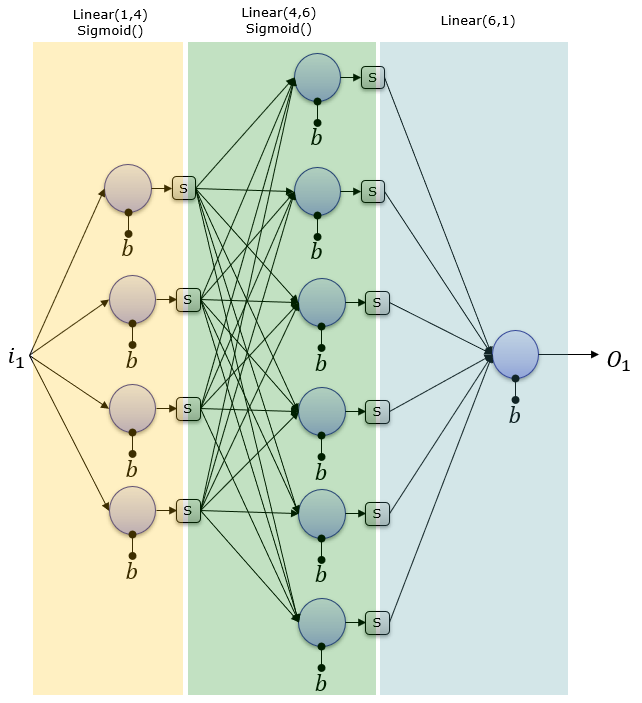

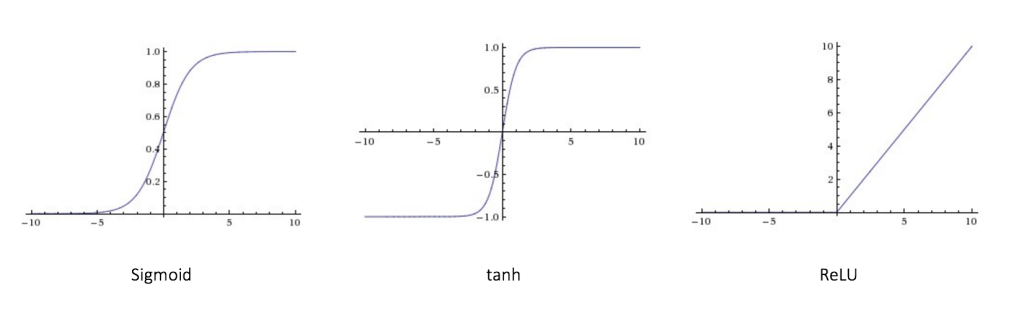

In [ ]:
# Sigmoid: takes a real-valued input and squashes it to range between 0 and 1
# σ(x) = 1 / (1 + exp(−x))